## 1.- Set up the enviroment

In [2]:
## Ecuaciones diferenciales -Espacios Fases

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#from numpy import *
#from matplotlib.pyplot import *
#from matplotlib import gridspec
%matplotlib inline

In [4]:
def Energia(x, args):
    # args[0] = 0 --> cartesianas
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    if args[0] == 0:
        return 0.5*(x[2]*x[2]+x[3]*x[3]) + 0.5*args[1]*(x[0]*x[0]+x[1]*x[1])
    else:
        return 0.5*(x[2]*x[2]+x[0]*x[0]*x[3]*x[3]) + 0.5*args[1]*x[0]*x[0]

# Se define el metodo de integracion
def RK4_1(ec, p_ini, x, h=0.1, args=[0.,1.,0.1,0.2]):
    # args[0] = 0 --> cartesianas
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    tiempos = np.arange(x[0],x[1]+h,h)
    sol = np.zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    # Se calcula la energia del sistema al inicio
    E0 = Energia(p_ini, args)
    for i in range(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i], args)
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h, args)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h, args)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h, args)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
        
        # Se calcula la energia para detener la simulacion si En < 0.01 E0
        En = Energia(sol[i+1,:], args)
        if En < 0.01*E0:
            tiempos = tiempos[:i]
            sol = sol[:i, :]
            return tiempos,sol
        
    return tiempos,sol

# Se define el sistema de ecuaciones diferenciales por resolver para coordenadas cartesianas
def ec_dif1_cart(x, t, args=[0.,1.,0.1,0.2]):
    # args[0] = 0 --> cartesianas
    # args[resto] = k, gamma, mu
    
    v = np.sqrt(x[2]*x[2]+x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[3]*np.sqrt(v)*np.array([x[2],x[3]])
    else:
        f_fric = -args[2]*np.array([x[2],x[3]])
    
    dux = - args[1]*x[0]+f_fric[0]
    duy = - args[1]*x[1]+f_fric[1]
    return np.array([x[2], x[3], dux, duy])

# Se define el sistema de ecuaciones diferenciales por resolver para coordenadas polares
def ec_dif1_polar(x, t, args=[1.,1.,0.1,0.2]):
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    
    v = np.sqrt(x[2]*x[2]+x[0]*x[0]*x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[3]*np.sqrt(v)*np.array([x[2], x[3]])
    else:
        f_fric = -args[2]*np.array([x[2], x[3]])
    
    dur = x[0]*x[3]*x[3] - args[1]*x[0] + f_fric[0]
    dut = -2.0*x[2]*x[3]/x[0] + f_fric[1]
    
    return np.array([x[2], x[3], dur, dut])

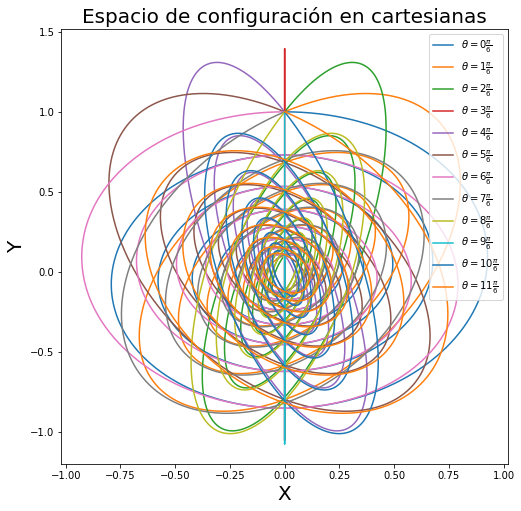

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

theta = [n*np.pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    cond_ini = np.array([0, 1, np.cos(theta[i]), np.sin(theta[i])])
    tiempo, sol = RK4_1(ec_dif1_cart, cond_ini, [0,N], 0.01, [0,1,0.1,0.2])
    
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,0], sol[:,1], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    ax.set_xlabel("X", fontsize=20); ax.set_ylabel("Y", fontsize=20)
    ax.set_title(u"Espacio de configuración en cartesianas", fontsize=20)
    ax.legend()

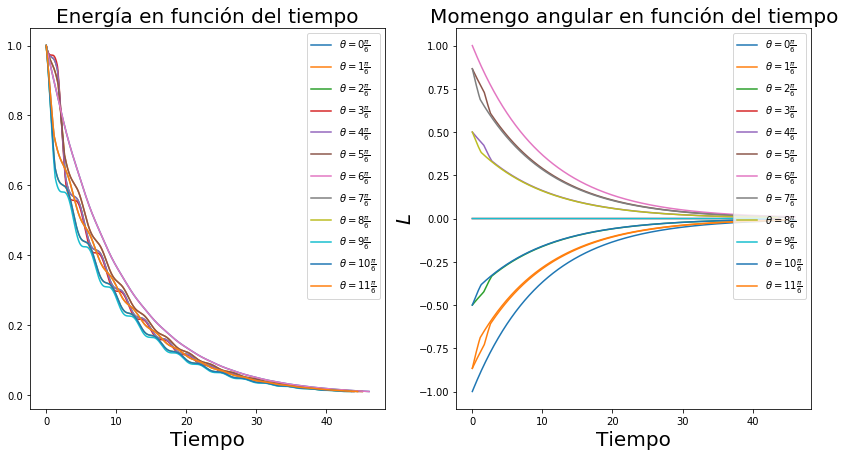

In [7]:

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

theta = [n*np.pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    cond_ini = np.array([0, 1, np.cos(theta[i]), np.sin(theta[i])])
    tiempo, sol = RK4_1(ec_dif1_cart, cond_ini, [0,N], 0.01, [0,1,0.1,0.2])
    # Se grafica la energia en funcion del tiempo
    Energies = np.zeros_like(tiempo)
    for n in range(len(tiempo)): Energies[n] = Energia(sol[n,:], [0,1,0.1,0.2])
    ax.plot(tiempo, Energies, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    ax.set_xlabel("Tiempo", fontsize=20); bx.set_ylabel("$E/E_0$", fontsize=20)
    ax.set_title(u"Energía en función del tiempo", fontsize=20)
    ax.legend()
    
    # Se grafica el momento angular en funcion del tiempo
    Mom_angular = np.zeros_like(tiempo)
    for n in range(len(tiempo)):
        Mom_angular[n] = sol[n,0]*sol[n,3]-sol[n,1]*sol[n,2]
    bx.plot(tiempo, Mom_angular, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    bx.set_xlabel("Tiempo", fontsize=20); bx.set_ylabel("$L$", fontsize=20)
    bx.set_title(u"Momengo angular en función del tiempo", fontsize=20)
    bx.legend()

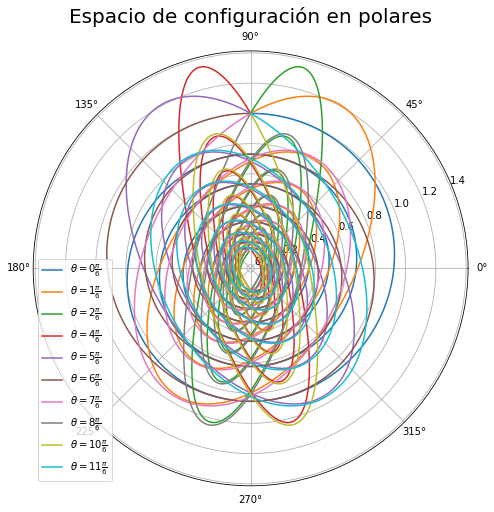

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')

theta = [n*np.pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    if abs(theta[i]%np.pi) != np.pi/2:
        cond_ini = np.array([1., np.pi/2., np.sin(theta[i]), -np.cos(theta[i])])
        tiempo, sol = RK4_1(ec_dif1_polar, cond_ini, [0,N], 0.01, [1,1.,0.1,0.2])

        # Se grafica el espacio de configuracion
        ax.plot(sol[:,1], sol[:,0], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        ax.set_title(u"Espacio de configuración en polares", fontsize=20)
        ax.legend(loc='best')

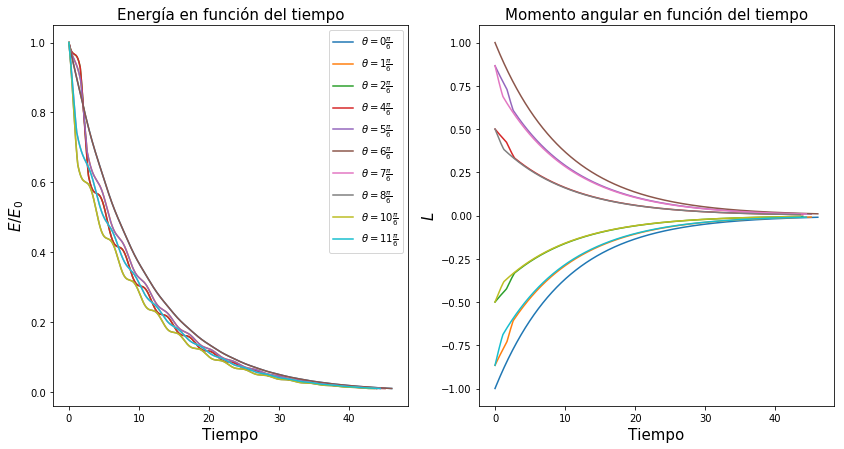

In [10]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

theta = [n*np.pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    if abs(theta[i]%np.pi) != np.pi/2:
        cond_ini = np.array([1., np.pi/2., np.sin(theta[i]), -np.cos(theta[i])])
        tiempo, sol = RK4_1(ec_dif1_polar, cond_ini, [0,N], 0.01, [1,1.,0.1,0.2])
        # Se grafica la energia en funcion del tiempo
        Energies = np.zeros_like(tiempo)
        for n in range(len(tiempo)): 
            Energies[n] = Energia(sol[n,:], [1,1.,0.1,0.2])
        ax.plot(tiempo, Energies, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        ax.set_xlabel("Tiempo", fontsize=15); 
        ax.set_ylabel("$E/E_0$", fontsize=15)
        ax.set_title(u"Energía en función del tiempo", fontsize=15)
        ax.legend(loc = 'best')
        
        # Se grafica el momento angular en funcion del tiempo
        Mom_angular = np.zeros_like(tiempo)
        for n in range(len(Mom_angular)): 
            Mom_angular[n] = sol[n,0]*sol[n,0]*sol[n,3]
        bx.plot(tiempo, Mom_angular, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        bx.set_xlabel("Tiempo", fontsize=15); 
        bx.set_ylabel("$L$", fontsize=15)
        bx.set_title(u"Momento angular en función del tiempo", fontsize=15)

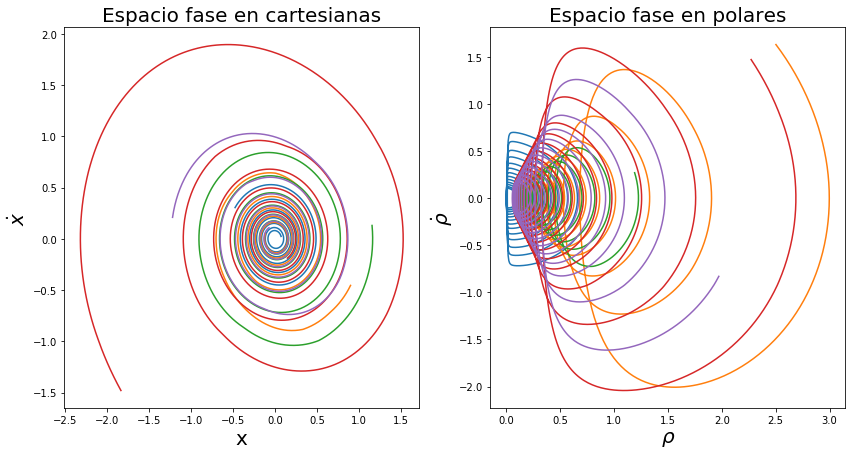

In [12]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

N = 40
for n in range(5):
    cond_ini_cart = np.random.randn(4)
    rho = np.sqrt(cond_ini_cart[0]**2+cond_ini_cart[1]**2)
    theta = np.arctan2(cond_ini_cart[1],cond_ini_cart[0])
    rho_p = (cond_ini_cart[0]*cond_ini_cart[2]+cond_ini_cart[1]*cond_ini_cart[3])/rho
    theta_p = (cond_ini_cart[0]*cond_ini_cart[3]-cond_ini_cart[1]*cond_ini_cart[2])/rho**2
    
    cond_ini_polar = [rho, theta, rho_p, theta_p]
    tiempo, sol_cart = RK4_1(ec_dif1_cart, cond_ini_cart, [0,N], 0.01, [0,1,0.1,0.2])
    tiempo, sol_polar = RK4_1(ec_dif1_polar, cond_ini_polar, [0,N], 0.01, [1,1,0.1,0.2])

    # Se grafica el espacio de fase en cartesianas
    ax.plot(sol_cart[:,0], sol_cart[:,2])
    ax.set_xlabel("x", fontsize=20); ax.set_ylabel("$\\dot x$", fontsize=20)
    ax.set_title(u"Espacio fase en cartesianas", fontsize=20)

    # Se grafica el espacio de fase en polares
    bx.plot(sol_polar[:,0], sol_polar[:,2])
    bx.set_xlabel("$\\rho$", fontsize=20); bx.set_ylabel("$\\dot \\rho$", fontsize=20)
    bx.set_title(u"Espacio fase en polares", fontsize=20)

In [13]:
def metodoNewton(func, x_ini, args, h=0.1, epsilon=1e-9):
    while abs(func(x_ini, args)) >= epsilon:
        d_func = (-func(x_ini+2*h, args)+8*func(x_ini+h, args)-8*func(x_ini-h, args)+func(x_ini-2*h, args))/(12*h)
        raiz = x_ini - func(x_ini, args)/d_func
        x_ini = raiz
    return raiz
    
def grad_v_ef(x, args=[1., 1., 1., 1.]):
    #args = [m, omega0, q2, l]
    return args[0]*args[0]*args[1]*args[1]*x*x*x*x+args[0]*args[2]*x-args[3]*args[3]

def V_ef(x, args=[1., 1., 1., 1.]):
    #args = [m, omega0, q2, l]
    return 0.5*args[3]*args[3]/(args[0]*x*x)+0.5*args[0]*args[1]*args[1]*x*x-args[2]/x

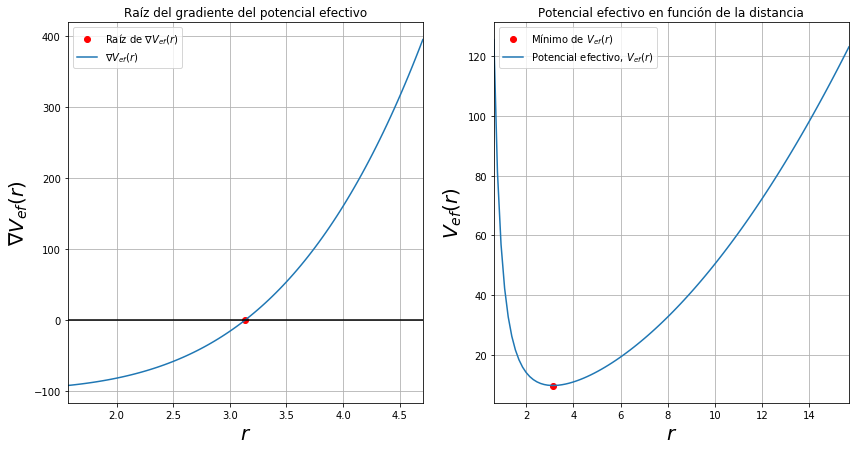

In [14]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

args = [1., 1., 1., 10.]
#args = [m, omega0, q2, l]
r0 = metodoNewton(grad_v_ef, 0.1, args)
r = np.linspace(0.5*r0,1.5*r0,100)
r_ef = np.linspace(0.2*r0,5*r0,100)
Grad_V_ef = grad_v_ef(r, args)
V_ef_ = V_ef(r_ef, args)

ax.set_title(u"Raíz del gradiente del potencial efectivo")
ax.plot([r0],[0],'ro', label=u"Raíz de $\\nabla V_{ef}(r)$")
ax.plot(r, Grad_V_ef, label=u"$\\nabla V_{ef}(r)$")
ax.plot(r, np.zeros_like(r), color='black')
ax.set_xlabel("$r$", fontsize=20)
ax.set_ylabel("$\\nabla V_{ef}(r)$", fontsize=20)
ax.set_xlim(r[0],r[-1])
ax.grid(True)
ax.legend(loc='best')

bx.set_title(u"Potencial efectivo en función de la distancia")
bx.plot([r0], [V_ef(r0, args)], 'ro', label=u"Mínimo de $V_{ef}(r)$")
bx.plot(r_ef, V_ef_, label="Potencial efectivo, $V_{ef}(r)$")
bx.set_xlabel("$r$", fontsize=20)
bx.set_ylabel("$V_{ef} (r)$", fontsize=20)
bx.set_xlim(r_ef[0],r_ef[-1])
bx.grid(True)
bx.legend(loc='best');

In [17]:
## Se define el sistema de ecuaciones diferenciales por resolver para coordenadas polares
def ec_dif2_polar(x, t, args=[1.,1.,1.,0.1,0.2]):
    # args[0] = 1 --> polares
    # args[resto] = m, omega0, q2, gamma, mu
    
    v = np.sqrt(x[2]*x[2]+x[0]*x[0]*x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[-1]*np.sqrt(v)*np.array([x[2], x[3]])
    else:
        f_fric = -args[-2]*np.array([x[2], x[3]])
    
    dur = f_fric[0]/args[1] + x[0]*x[3]*x[3] - args[2]*x[0] - args[3]/(args[1]*x[0]*x[0])
    dut = f_fric[1]/args[1] - 2.0*x[2]*x[3]/x[0]
    
    return np.array([x[2], x[3], dur, dut])

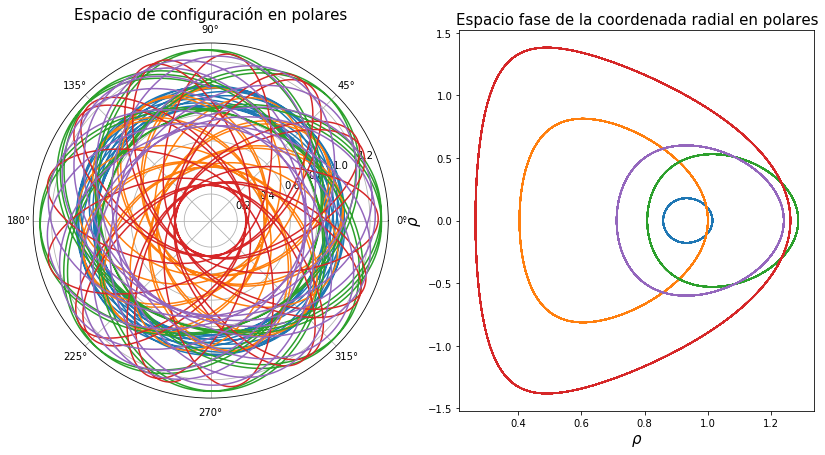

In [18]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 50
for i in range(5):
    cond_ini = np.array([1., np.pi/2., np.random.rand(), 0.5+np.random.rand()])
    tiempo, sol = RK4_1(ec_dif2_polar, cond_ini, [0,N], 0.005, [1.,1.,1.,1.,0.,0.])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)

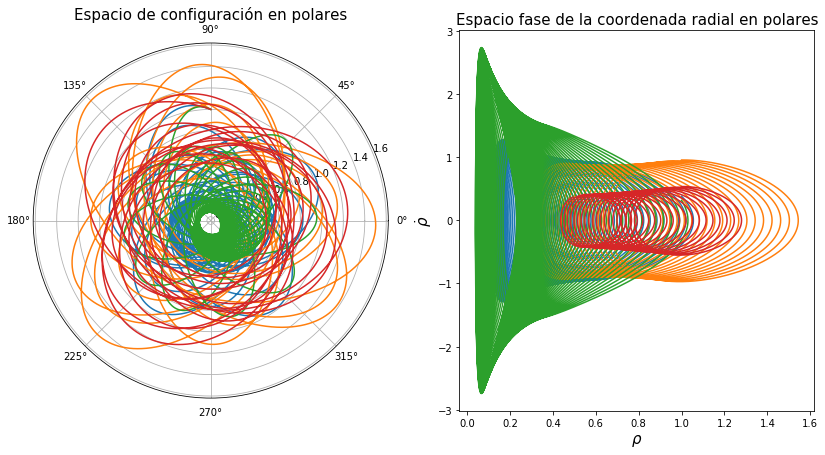

In [19]:

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 50
for i in range(4):
    cond_ini = np.array([1., np.pi/2., np.random.rand(), 0.5+np.random.rand()])
    tiempo, sol = RK4_1(ec_dif2_polar, cond_ini, [0,N], 0.001, [1.,1.,1.,1.,0.02,0.01])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)

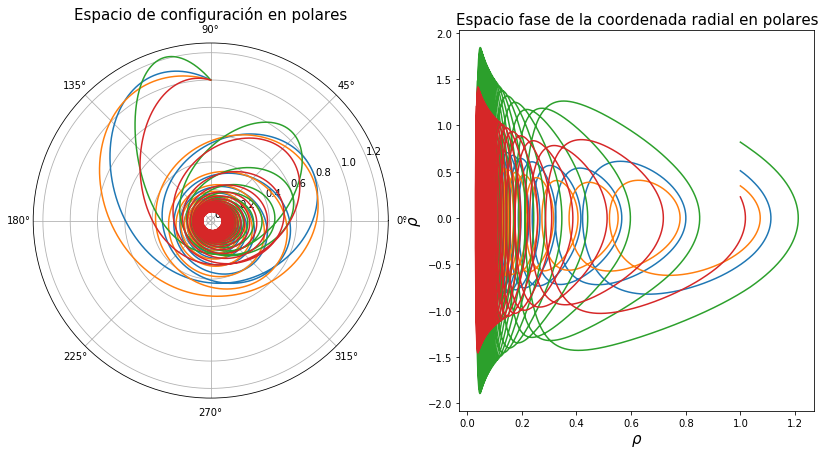

In [20]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 10
for i in range(4):
    cond_ini = np.array([1., np.pi/2., np.random.rand(), 0.5+np.random.rand()])
    tiempo, sol = RK4_1(ec_dif2_polar, cond_ini, [0,N], 0.001, [1.,1.,1.,1.,0.,0.1])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)

In [21]:
# se define el metodo de integracion
def RK4(ec, p_ini, x, h=0.1, args=[]):
    if abs(x[1]-x[0])<=10*h:
        h = abs(x[1]-x[0])/100.    
    tiempos = np.arange(x[0],x[1]+h,h)
    sol = np.zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i], args)
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h, args)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h, args)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h, args)
        sol[i+1,:] = sol[i,:] + (h/6.0)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

# se define la ecuacion de movmiento
def ec_mov_3(x, t, args=[0,9.8,1]):
    f = args[0] * np.array([x[2], x[3]])
    return np.array([x[2], x[3], -f[0]/args[2], -args[1] - f[1]/args[2]])

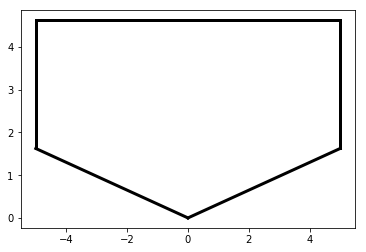

In [25]:
# funcion que dibuja la caja
def geometria(alpha, AX):
    x, y = np.linspace(-5, 5, 51), np.linspace(5*np.tan(alpha),3+5*np.tan(alpha))
    AX.plot(x, (3+5*np.tan(alpha))*np.ones_like(x), 'black', linewidth=3) # Techo
    AX.plot(-5*np.ones_like(y), y, 'black', linewidth=3) # Pared Izq
    AX.plot(5*np.ones_like(y), y, 'black', linewidth=3) # Pared Der
    AX.plot(x[:26], -np.tan(alpha)*x[:26], 'black', linewidth=3) # Pared Piso Izq
    AX.plot(x[25:], np.tan(alpha)*x[25:], 'black', linewidth=3) # Pared Piso Der
    
f, ax = plt.subplots()
geometria(np.pi/10, ax)

In [37]:
def rebote_paredes(ec_mov, x, mi_dt, x_pared, args=[0,9.8,0.1]):
    # Se refina el intervalo temporal
    dt_busqueda = mi_dt/2
    y0 = x
    t,sol = RK4(ec_mov, y0, [0,dt_busqueda], 0.1, args)
    y1 = sol[-1,:]
    # se determina en que intervalo temporal ocurrio el rebote
    while abs(x_pared-abs(y0[0])) > 1e-4:
        if abs(y1[0]) < x_pared:
            reinicio = y1
        else:
            reinicio = y0   
        dt_busqueda = dt_busqueda/2
        t,sol = RK4(ec_mov, reinicio, [0,dt_busqueda], 0.1, args)
        # Se redefine el intervalo de evaluacion
        y0, y1 = reinicio, sol[-1,:]
    
    # solo se invierte la velocidad horizontal
    y0[2] *= -1
    return y0

def rebote_techo(ec_mov, x, mi_dt, y_techo, args=[0,9.8,0.1]):
    # Se refina el intervalo temporal
    dt_busqueda = mi_dt/2
    y0 = x
    t,sol = RK4(ec_mov, y0, [0,dt_busqueda], 0.1, args)
    y1 = sol[-1,:]
    # se determina en que intervalo temporal ocurrio el rebote
    while abs(y_techo-y0[1]) > 1e-4:
        if y1[1] > y_techo:
            reinicio = y1
        else:
            reinicio = y0   
        dt_busqueda = dt_busqueda/2
        t,sol = RK4(ec_mov, reinicio, [0,dt_busqueda], 0.1, args)
        y0, y1 = reinicio, sol[-1,:]
    # solo se invierte la velocidad vertical
    y0[3] *= -1
    return y0

def rebote_piso(ec_mov, x, mi_dt, alpha, args=[0,9.8,0.1]):
    dt_busqueda = mi_dt/2
    y0 = x
    t,sol = RK4(ec_mov, y0, [0,dt_busqueda], 0.1, args)
    y1 = sol[-1,:]
    # se determina en que intervalo temporal ocurrio el rebote
    while abs(y0[1] - abs(y0[0])*np.tan(alpha)) > 1e-4:
        if y1[1] > abs(y1[0])*np.tan(alpha):
            reinicio = y1
        else:
            reinicio = y0   
        dt_busqueda = dt_busqueda/2
        t,sol = RK4(ec_mov, reinicio, [0,dt_busqueda], 0.1, args)
        y0 = reinicio
        y1 = sol[-1,:]
        
    V = np.sqrt(y0[2]**2+y0[3]**2)
    beta = np.arctan(y0[1]/y0[0])
    # Se determinan las condicones de rebote, se rota el sistema y se calculan las nuevas velocidades
    if y0[2]<0:
        if not np.isclose(0.0,y0[2]):
            gamma = np.pi+np.arctan(y0[3]/y0[2]) 
        else:
            gamma = -np.pi/2
    else:
        if not np.isclose(0.0,y0[2]):
            gamma = np.arctan(y0[3]/y0[2]) 
        else:
            gamma = -np.pi/2
        
    y0[3] = V*np.sin(2*beta-gamma)
    y0[2] = V*np.cos(2*beta-gamma)
    return y0

In [38]:
def evolucion_3(N=1000, mi_dt=0.1):
    fig, axarr = plt.subplots(3, 2, figsize=(14,21))
    ang = [np.pi/6., np.pi/10.]
    for k in range(3):
        for j in range(2):
            p = [-10./3. , 10./3.*np.tan(ang[j])+0.1 , np.cos(k*ang[j]) , np.sin(k*ang[j])]
            # se define un arreglo vacio donde se ira guardando la trayectoria
            trayectoria = np.zeros((N,len(p)))
            # se incluye la condicion inicial a la trayectoria
            trayectoria[0,:] = np.array(p)
            
            rebotes = 0
            i = 0
            while rebotes < 23 and i < N-1:
                # se resuelve la ecuacion de movimiento en un delta t
                t,sol = RK4(ec_mov_3, trayectoria[i,:], [0,mi_dt], args=[0,9.8,0.1])
                y = sol[-1,:]
                if y[1] < abs(y[0])*np.tan(ang[j]): 
                    y = rebote_piso(ec_mov_3, trayectoria[i,:], mi_dt, ang[j], args=[0,9.8,0.1])
                    rebotes += 1
                # rebote techo
                elif y[1] > 3+5*np.tan(ang[j]):
                    y = rebote_techo(ec_mov_3, trayectoria[i,:], mi_dt, 3+5*np.tan(ang[j]), args=[0,9.8,0.1])
                    rebotes += 1
                # condicion paredes
                elif abs(y[0]) > 5:
                    y = rebote_pared(ec_mov_3, trayectoria[i,:], mi_dt, 5, args=[0,9.8,0.1])
                    rebotes += 1
                    
                trayectoria[i+1,:] = y
                i+=1

            # se pinta la trayectoria y el punto inicial
            axarr[k,j].plot(trayectoria[0,0], trayectoria[0,1],'or', markersize=7)
            axarr[k,j].plot(trayectoria[:,0], trayectoria[:,1],'r',linewidth=1)
            axarr[k,j].grid(True)
            geometria(ang[j], axarr[k,j])
            
            if j==0:
                axarr[k,j].title.set_text("$\\alpha = \\pi/6\\ ,\\ v = (\\cos {} \\alpha, \\sin {} \\alpha)$".format(k+1,k+1))
            else:
                axarr[k,j].title.set_text("$\\alpha = \\pi/10\\ ,\\ v = (\\cos {} \\alpha, \\sin {} \\alpha)$".format(k+1,k+1))

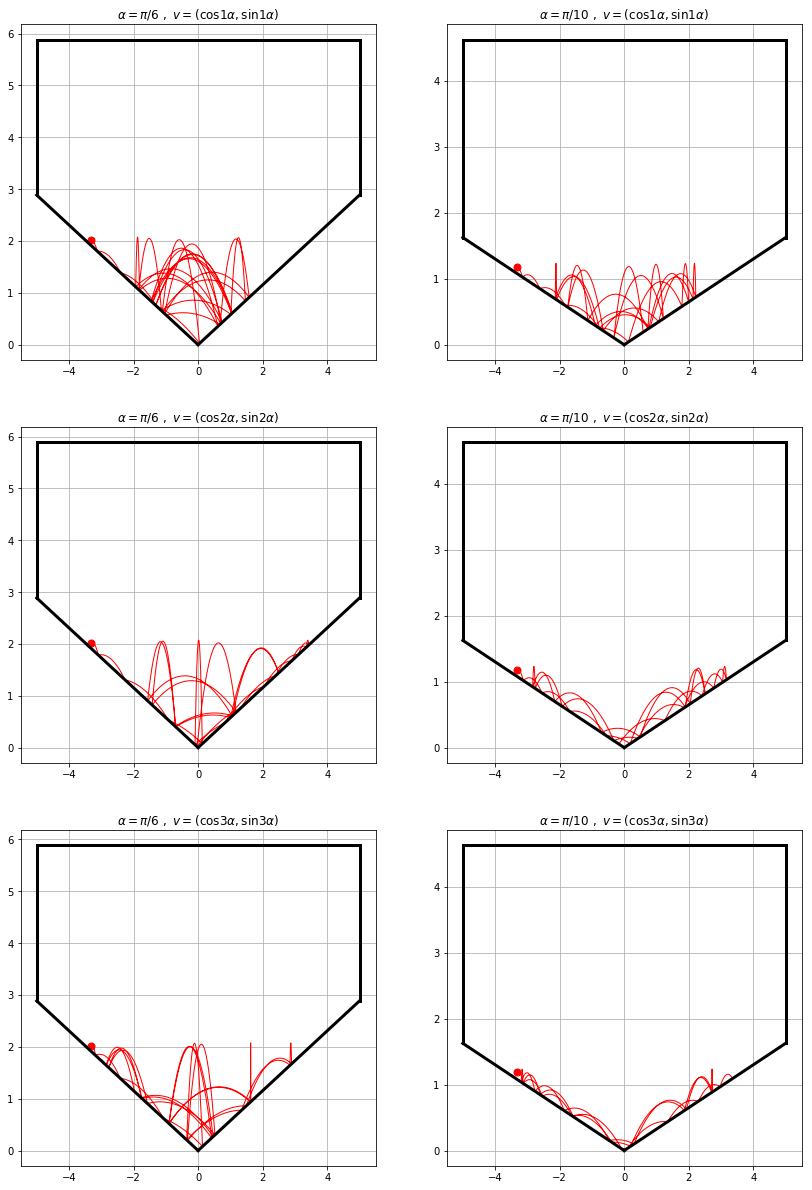

In [39]:
evolucion_3(N=10000, mi_dt=0.01)


In [40]:
def evolucion_comparacion(N=1000, mi_dt=0.1):
    fig, axarr = plt.subplots(3, 2, figsize=(14,21))
    ang = [np.pi/6., np.pi/10.]
    for k in range(3):
        for j in range(2):
            for gamma in [0.0, 0.05]:
                p = [-10./3. , 10./3.*np.tan(ang[j])+0.1 , np.cos(k*ang[j]) , np.sin(k*ang[j])]
                # se define un arreglo vacio donde se ira guardando la trayectoria
                trayectoria = np.zeros((N,len(p)))
                # se incluye la condicion inicial a la trayectoria
                trayectoria[0,:] = np.array(p)

                rebotes = 0
                i = 0
                while rebotes < 23 and i < N-1:
                    # se resuelve la ecuacion de movimiento en un delta t
                    t,sol = RK4(ec_mov_3, trayectoria[i,:], [0,mi_dt], mi_dt/10, args=[gamma,9.8,0.1])
                    y = sol[-1,:]
                    if y[1] < abs(y[0])*np.tan(ang[j]): 
                        y = rebote_piso(ec_mov_3, trayectoria[i,:], mi_dt, ang[j], args=[gamma,9.8,0.1])
                        rebotes += 1
                    # rebote techo
                    elif y[1] > 3+5*np.tan(ang[j]):
                        y = rebote_techo(ec_mov_3, trayectoria[i,:], mi_dt, 3+5*np.tan(ang[j]), args=[gamma,9.8,0.1])
                        rebotes += 1
                    # condicion paredes
                    elif abs(y[0]) > 5:
                        y = rebote_pared(ec_mov_3, trayectoria[i,:], mi_dt, 5, args=[gamma,9.8,0.1])
                        rebotes += 1

                    trayectoria[i+1,:] = y
                    i+=1
                if gamma==0:
                    # se pinta la trayectoria y el punto inicial
                    axarr[k,j].plot(trayectoria[0,0], trayectoria[0,1],'or', markersize=7)
                    axarr[k,j].plot(trayectoria[:,0], trayectoria[:,1],'r',linewidth=1, label="$\\gamma = {}$".format(gamma))
                else:
                    # se pinta la trayectoria y el punto inicial
                    axarr[k,j].plot(trayectoria[:,0], trayectoria[:,1],'b',linewidth=1, label="$\\gamma = {}$".format(gamma))
                
                geometria(ang[j], axarr[k,j])
                axarr[k,j].grid(True)
                axarr[k,j].legend(loc='best')
                if j==0:
                    axarr[k,j].title.set_text("$\\alpha = \\pi/6\\ ,\\ v = (\\cos {} \\alpha, \\sin {} \\alpha)$".format(k+1,k+1))
                else:
                    axarr[k,j].title.set_text("$\\alpha = \\pi/10\\ ,\\ v = (\\cos {} \\alpha, \\sin {} \\alpha)$".format(k+1,k+1))

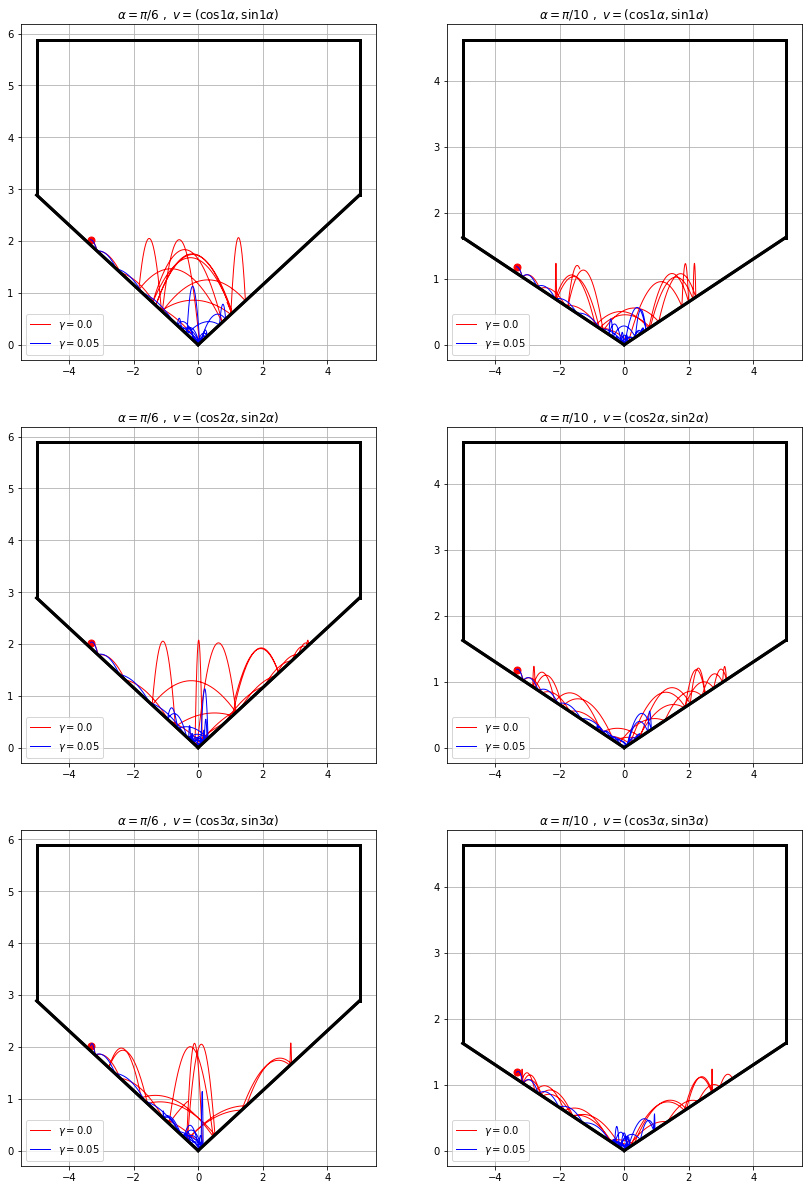

In [41]:
evolucion_comparacion(N=1000, mi_dt=0.01)

In [42]:
def evolucion_espacio_fase(N=1000, mi_dt=0.1):
    fig, axarr = plt.subplots(2, 2, figsize=(14,14))
    ang = [np.pi/6., np.pi/10.]
    for j in range(2):
        p = [-10./3. , 10./3.*np.tan(ang[j])+0.1, -np.cos(ang[j]), np.sin(ang[j])]
        # se define un arreglo vacio donde se ira guardando la trayectoria
        trayectoria = np.zeros((N,len(p)))
        # se incluye la condicion inicial a la trayectoria
        trayectoria[0,:] = np.array(p)
            
        rebotes = 0
        i = 0
        while rebotes < 200 and i < N-1:
            # se resuelve la ecuacion de movimiento en un delta t
            t,sol = RK4(ec_mov_3, trayectoria[i,:], [0,mi_dt], args=[0,9.8,0.1])
            y = sol[-1,:]
            if y[1] < abs(y[0])*np.tan(ang[j]): 
                y = rebote_piso(ec_mov_3, trayectoria[i,:], mi_dt, ang[j], args=[0,9.8,0.1])
                rebotes += 1
            # rebote techo
            elif y[1] > 3+5*np.tan(ang[j]):
                y = rebote_techo(ec_mov_3, trayectoria[i,:], mi_dt, 3+5*np.tan(ang[j]), args=[0,9.8,0.1])
                rebotes += 1
            # condicion paredes
            elif abs(y[0]) > 5:
                y = rebote_pared(ec_mov_3, trayectoria[i,:], mi_dt, 5, args=[0,9.8,0.1])
                rebotes += 1
                    
            trayectoria[i+1,:] = y
            i+=1

        # se pinta la trayectoria y el punto inicial
        axarr[j,0].plot(trayectoria[0,0], trayectoria[0,2],'or', markersize=7)
        axarr[j,0].plot(trayectoria[:,0], trayectoria[:,2],'r',linewidth=1)
        
        axarr[j,1].plot(trayectoria[0,1], trayectoria[0,3],'or', markersize=7)
        axarr[j,1].plot(trayectoria[:,1], trayectoria[:,3],'r',linewidth=1)
        
        axarr[j,0].set_xlabel("$x$", fontsize=20)
        axarr[j,1].set_xlabel("$y$", fontsize=20)
        
        axarr[j,0].set_ylabel("$p_x$", fontsize=20)
        axarr[j,1].set_ylabel("$p_y$", fontsize=20)
        
        if j==0:
            axarr[j,0].title.set_text("Espacio fase en x, con $\\alpha=\\pi/6$")
            axarr[j,1].title.set_text("Espacio fase en y, con $\\alpha=\\pi/6$")
        else:
            axarr[j,0].title.set_text("Espacio fase en x, con $\\alpha=\\pi/10$")
            axarr[j,1].title.set_text("Espacio fase en y, con $\\alpha=\\pi/10$")
        
        axarr[j,0].grid(True)
        axarr[j,1].grid(True)

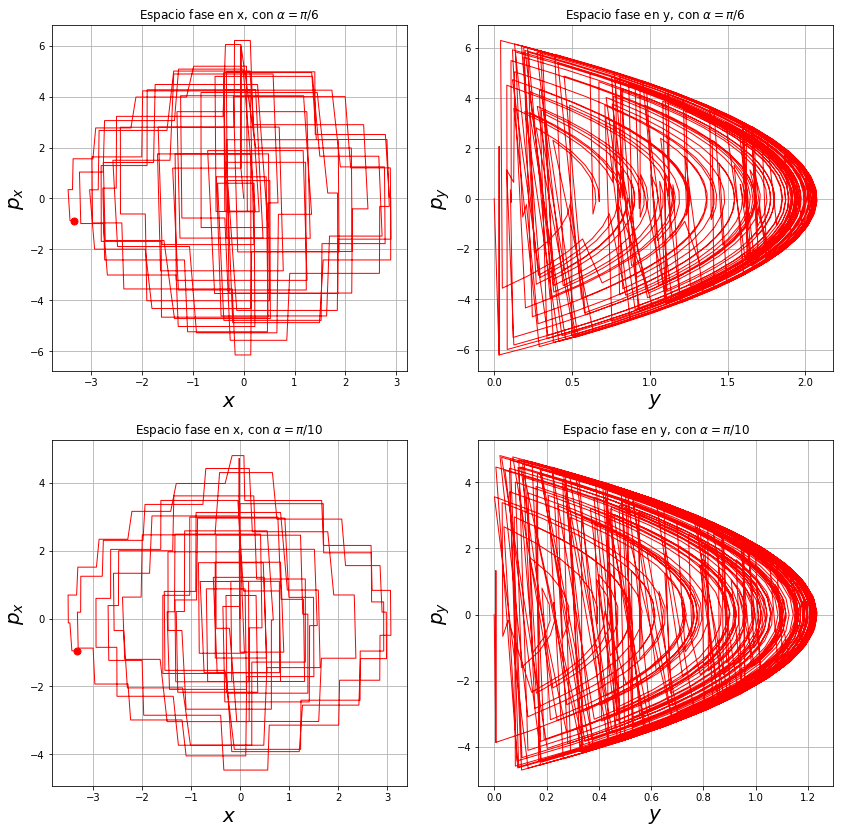

In [43]:
evolucion_espacio_fase(N=50000, mi_dt=0.05)

In [44]:
def ec_mov_4(x, t, g=0.0):
    return np.array([x[2],x[3],0.0,g])

def condicion_ini(v):
    r = np.random.uniform(1,2)
    theta = np.random.uniform(0,2*np.pi)
    x,y = r*np.cos(theta), r*np.sin(theta)
    vx,vy = np.random.uniform(-v,v,2)
    return np.array([x,y,vx,vy])

In [51]:
def rebote_cascaron(ec_mov, r_i, mi_dt, limit, caso, tol=1e-4, arg=0):
    # parametro que nos dice si el rebote es en la pared externa o interna
    if caso=="ext":
        p = -1
    else:
        p = 1
    
    # se refina el paso temporal para buscar donde debe de rebotar
    dt_busqueda = mi_dt/2.
    # se calcula el la trayectoria desde el punto anterior dt_busqueda
    y0 = r_i
    t,sol = RK4(ec_mov,y0,[0,dt_busqueda],args=arg)
    y1 = sol[-1,:]
    
    # Como el sistema esta en cartesianas se tiene que pasar a polares para evaluar los radios
    r0, r1 = np.sqrt(y0[0]**2+y0[1]**2), np.sqrt(y1[0]**2+y1[1]**2)
    while abs(r0-limit) > tol:
        # se determina en que intervalo temporal ocurrio el rebote
        if (r1 - limit)*p < 0.:
            reinicio = y0
        else:
            reinicio = y1
        # se refina el paso temporal para buscar donde debe de rebotar
        dt_busqueda = dt_busqueda/2
        # se calcula el la trayectoria 
        t,sol = RK4(ec_mov,reinicio,[0,dt_busqueda],args=arg)
        # Se redefine el intervalo de evaluacion
        y0, y1 = reinicio, sol[-1,:]
        r0 = np.sqrt(y0[0]**2+y0[1]**2)
        r1 = np.sqrt(y1[0]**2+y1[1]**2)

    V = np.sqrt(y0[2]**2+y0[3]**2)
    alpha = np.arctan(y0[1]/y0[0])
    # se puede reducir a dos casos, pero lo dejo ahora por claridad
    if y0[2]<0:
        if not np.isclose(0.0,y0[2]):
            gamma = np.pi+np.arctan(y0[3]/y0[2]) 
        else:
            gamma = p*np.pi/2
    else:
        if not np.isclose(0.0,y0[2]):
            gamma = np.arctan(y0[3]/y0[2]) 
        else:
            gamma = p*np.pi/2
        
    y0[3] = V*np.sin(np.pi+2*alpha-gamma)
    y0[2] = V*np.cos(np.pi+2*alpha-gamma)
    return y0

In [54]:
def evolucion_4(p, g, N=100, mi_dt=0.1):
    # se define un arreglo vacio donde se ira guardando la trayectoria
    trayectoria = np.zeros((N,len(p)))
    # se incluye la condicion inicial a la trayectoria
    trayectoria[0,:] = np.array(p)

    for i in range(N-1):
        # se resuelve la ecuacion de movimiento en un delta t
        t,sol = RK4(ec_mov_4,trayectoria[i,:],[0,mi_dt], args=g)
        y, r = sol[-1,:], np.sqrt(sol[-1,0]*sol[-1,0]+sol[-1,1]*sol[-1,1])
        # rebote interno
        if r < 1.:
            y = rebote_cascaron(ec_mov_4, trayectoria[i,:], mi_dt,  1, "int", 1e-4, g)
        # rebote externo
        elif r > 2.:
            y = rebote_cascaron(ec_mov_4, trayectoria[i,:], mi_dt,2, "ext", 1e-4, g)
            
        trayectoria[i+1,:] = y
    
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111)
    ax.grid(True)

    # se pinta la trayectoria y el punto inicial
    ax.plot(trayectoria[0,0],trayectoria[0,1],'or', markersize=7)
    ax.plot(trayectoria[:,0],trayectoria[:,1],'r',linewidth=1)

    #circulos
    theta = np.linspace(0,2*np.pi,100)
    ax.plot(np.cos(theta), np.sin(theta), 'b', linewidth=3)
    ax.plot(2*np.cos(theta), 2*np.sin(theta), 'b', linewidth=3)

    ax.set_xlim([-2,2]),
    ax.set_ylim([-2,2])
    ax.set_title(u"Trayectoria de la partícula");

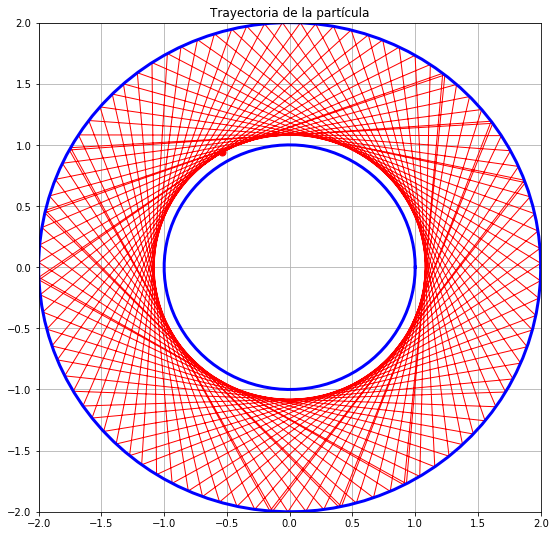

In [56]:
evolucion_4(condicion_ini(5), 0, 1000, 0.1)


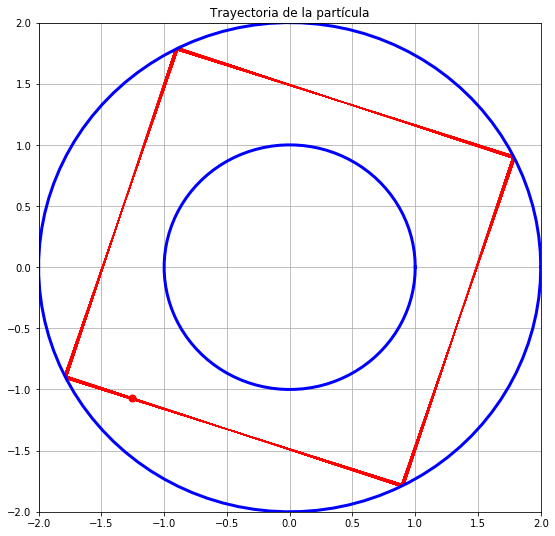

In [57]:
evolucion_4(condicion_ini(10), 0, 1000, 0.1)


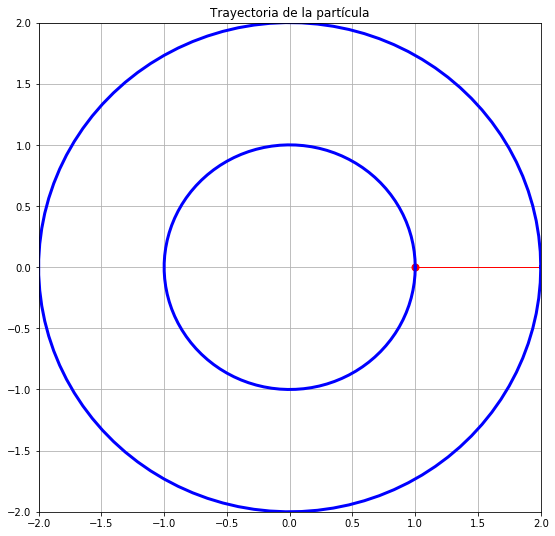

In [58]:
evolucion_4(np.array([1,0,1,0]), 0, 100, 0.1)


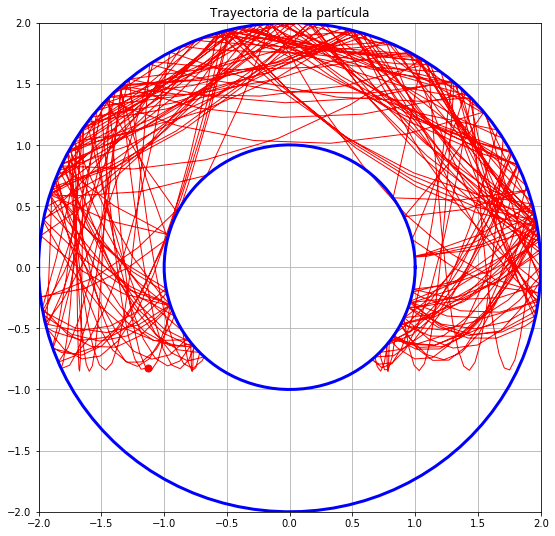

In [59]:
evolucion_4(condicion_ini(1), 10, 1000, 0.1)


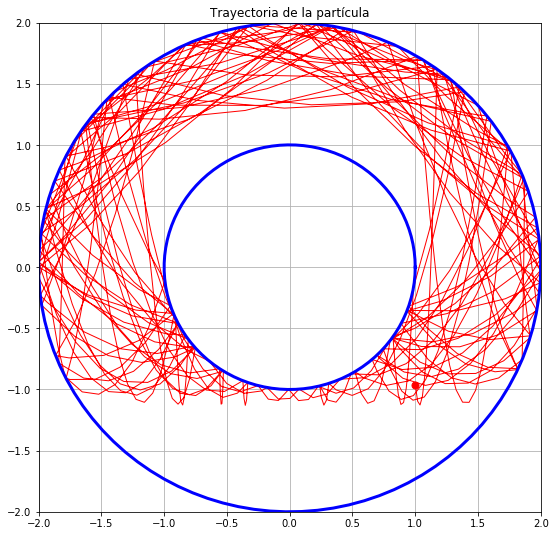

In [60]:
evolucion_4(condicion_ini(2), 10, 1000, 0.1)
